# Pymaceuticals Inc.
in this analysis, i looked at different drug regimens to determine a treatment that could be best used to combat squamous cell carcinoma (SCC). 
The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
### Analysis
- in regards to the gender testing, both male and female data was distributed equally with males being slightly higher
- there is a corrilation between weight and tumor volume as seen in the last couple of scatter plots. the pearsons correlation is at .84 which means while there is a corrilation; that does not mean the greater the size of mice, the bigger the tumor. we could only assume that since there is more room for the tumor to grow it could have the potential to match the weight of the mice.
- both capomulin and ramicane have the lowest final tumor volume compared to the other treatments tested. this can be concluded by observing the outliers test and box plot.

in conclution, capomulin and ramicane are the best treatments in comparison to infubinol and ceftamin. while limited to only 4 treatments, the data did show the best options for SCC. if in the future there are more drug treatments to compare between, i believe there would be better results and more insights to what is best to combat SCC.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [8]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
len(duplicate)

5

In [10]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate
show_dup = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
show_dup.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
Name: count, dtype: int64

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df['Mouse ID'].unique()))

249


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen\
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_reg = clean_df.groupby(['Drug Regimen'])
tumor_mean = drug_reg['Tumor Volume (mm3)'].mean()
tumor_median = drug_reg['Tumor Volume (mm3)'].median()
tumor_var = drug_reg['Tumor Volume (mm3)'].var()
tumor_std = drug_reg['Tumor Volume (mm3)'].std()
tumor_sem = drug_reg['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({'Mean Tumor Volume' : tumor_mean,
                              'Median Tumor Volume' : tumor_median,
                              'Variance Tumor Volume' : tumor_var,
                              'Standard deviation Tumor Volume' : tumor_std,
                              'SEM Tumor Volume' : tumor_sem
                             })
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_single = drug_reg['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


#create table, renaming columns
tumor_summary_single = tumor_summary_single.rename(columns={'mean': 'Mean Tumor Volume',
                                                  'median' : 'Median Tumor Volume',
                                                   'var' : 'Variance Tumor Volume',
                                                   'std' : 'Standard Dev Tumor Volume', 
                                                   'sem' : 'SEM Tumor Volume'
                                                           })
tumor_summary_single

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Treated')

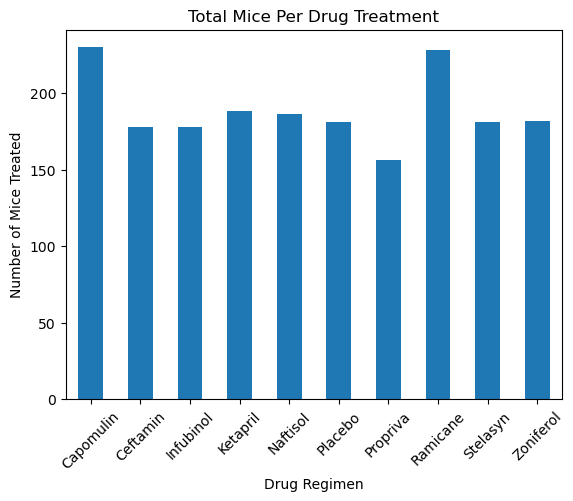

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
micetimepoints = clean_df.groupby(['Drug Regimen']).count()['Mouse ID']

#plot
barpandas = micetimepoints.plot.bar(x='Drug Regimen', y='Mouse ID', rot=45)
plt.title("Total Mice Per Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Treated")

<function matplotlib.pyplot.show(close=None, block=None)>

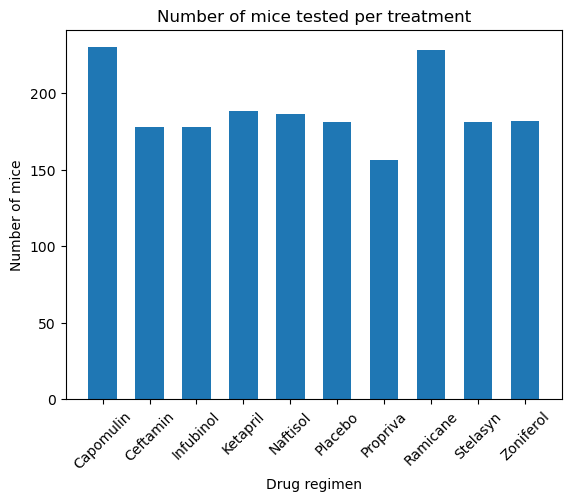

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = micetimepoints.index.values
y_axis = micetimepoints.values

plt.bar(x_axis, y_axis, width=0.6, align='center')
plt.title('Number of mice tested per treatment')
plt.xlabel('Drug regimen')
plt.ylabel('Number of mice')
plt.xticks(rotation=45)

plt.show

<Axes: title={'center': 'Sex Distribution Among Mice Treated'}>

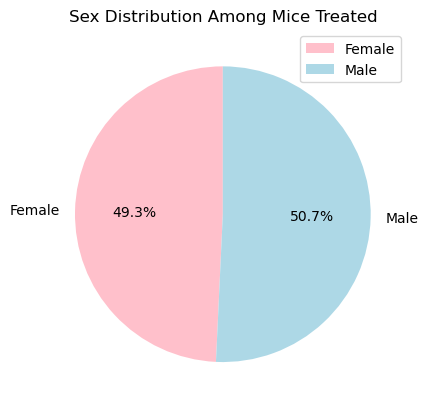

In [17]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
micegender = clean_df.groupby(["Sex"]).count()
micegender
#dataframe.plot
piepandas = micegender.plot.pie(y="Mouse ID", title=("Sex Distribution Among Mice Treated"), colors = ["pink","lightblue"],startangle=90,autopct='%1.1f%%')
#remove Mice ID label 
piepandas.set_ylabel("")
#display plot
piepandas


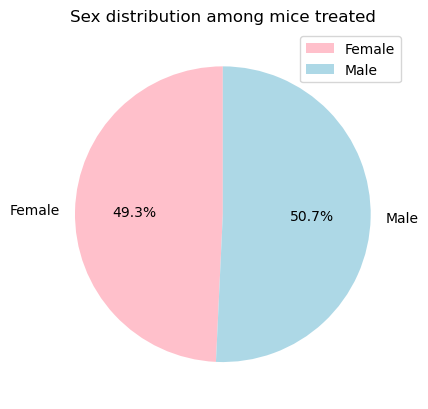

In [18]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
micegender
labels = ['Female', 'Male']
colors = ['pink','lightblue']

# Make the pie chart
plt.pie(micegender['Mouse ID'], labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title('Sex distribution among mice treated')
plt.legend(labels, loc='best')

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
finalvol = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
finalvol

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
finalvolmerge = pd.merge(finalvol, clean_df, on=(['Mouse ID', 'Timepoint']))
finalvolmerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [32]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #loc for each time drug is counted / tumor volumes that correlate
    tumorvolume = finalvolmerge.loc[finalvolmerge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumorvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorvolume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

    
    
#print outlier results
    print(f"For {treatment} values below {lower_bound} and above {upper_bound} are outliers.")

For Capomulin values below 20.70456164999999 and above 51.83201549 are outliers.
For Ramicane values below 17.912664470000003 and above 54.30681135 are outliers.
For Infubinol values below 36.83290494999999 and above 82.74144559000001 are outliers.
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 are outliers.


([<matplotlib.axis.XTick at 0x193793b0fd0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

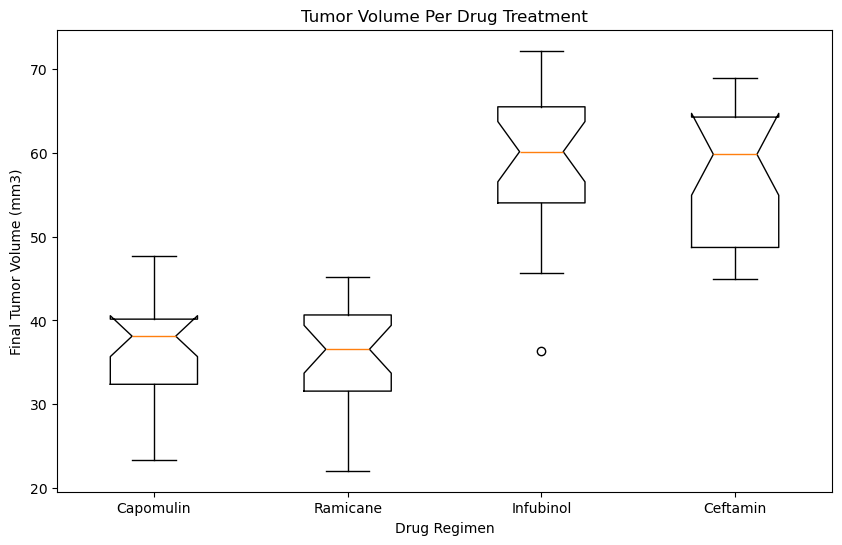

In [33]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots(figsize=(10,6))

#marker
flierprops = dict(marker='+', markerfacecolor='g', markersize=15, linestyle='none', markeredcolor='r')
ax1.boxplot(tumor_vol_data, flierprops)

#set labels
ax1.set_title('Tumor Volume Per Drug Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

#label ticks
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

## Line and Scatter Plots

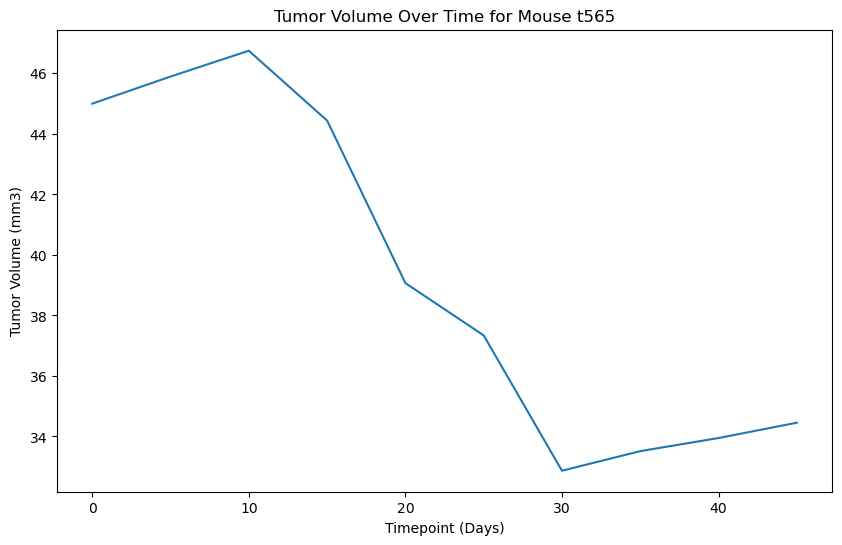

In [78]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#isolate Capomulin treatment data 
#view data to choose a mouse
cap_treatment = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_treatment.value_counts("Mouse ID")

#choose mouse t565 and isolate her data
t565 = clean_df.loc[clean_df["Mouse ID"] == "t565"]
t565

fig1,ax1 = plt.subplots(figsize=(10,6))
#make x & y axes
cap_xaxis = t565["Timepoint"]
cap_yaxis = t565["Tumor Volume (mm3)"]
plt.plot(cap_xaxis, cap_yaxis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse t565")
plt.show()

In [79]:
capomulin_mice = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
mice_id = capomulin_mice['Mouse ID'].unique()
print(mice_id)

['b128' 'b742' 'f966' 'g288' 'g316' 'i557' 'i738' 'j119' 'j246' 'l509'
 'l897' 'm601' 'm957' 'r157' 'r554' 'r944' 's185' 's710' 't565' 'u364'
 'v923' 'w150' 'w914' 'x401' 'y793']


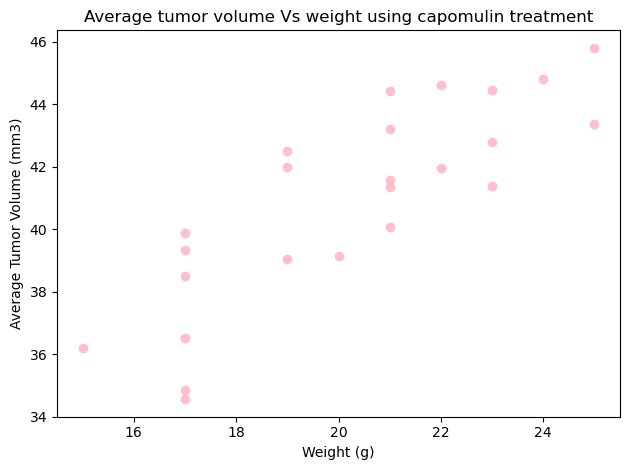

In [80]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Create two empyt lists to store averages
# Create two empyt lists to store averages
avg_volumes = []
avg_weights = []

# Create loop to calculate the averages
for mouse in mice_id:

    # First, create a filtered dataframe for each mouse
    mouse_avgs = capomulin_mice.loc[capomulin_mice['Mouse ID'] == mouse]

    # Calculate both of the averages and temporaroly store them in variables
    mouse_volume_avg = mouse_avgs['Tumor Volume (mm3)'].mean()
    mouse_weight_avg = mouse_avgs['Weight (g)'].mean()

    # Append values to lists for plotting
    avg_volumes.append(mouse_volume_avg)
    avg_weights.append(mouse_weight_avg)

# Generate a scatterplot using pyplot
plt.scatter(avg_weights, avg_volumes, marker='o', color='pink', edgecolor='pink')
plt.title('Average tumor volume Vs weight using capomulin treatment')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


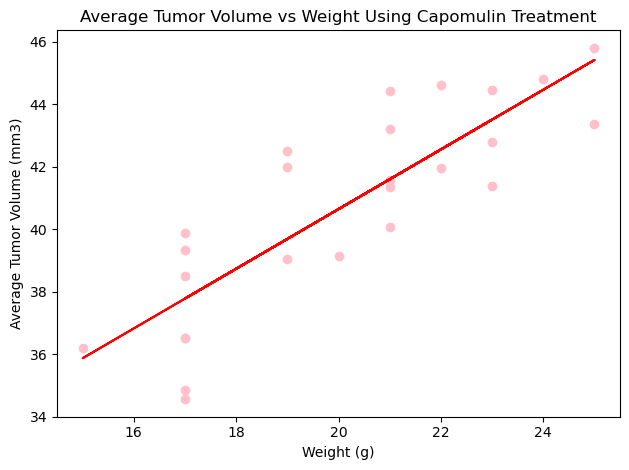

In [92]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_axis = np.array(avg_weights)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weights, avg_volumes)
regress_values = x_axis * slope + intercept
# Find the correlation coeficient
correlation = st.pearsonr(avg_weights, avg_volumes)
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f'The correlation between mouse weight and average tumor volume is {round(correlation.statistic,2)}')

# Display chart
plt.scatter(avg_weights, avg_volumes, marker='o', color='pink', edgecolor='pink')
plt.plot(avg_weights, regress_values,'r-')
plt.title('Average Tumor Volume vs Weight Using Capomulin Treatment')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.tight_layout()
plt.show()